## Summary statistic

In [ ]:
def calculate_normalized_com(times, intensities):
    """
    Calculate the normalized center of mass for a rainfall event.
    
    Parameters:
        times (np.array): Array of time points (scaled to the duration of the event, e.g., as fractions of the total duration)
        intensities (np.array): Array of rainfall intensities at the corresponding times
    
    Returns:
        float: The normalized center of mass of the rainfall event.
    """
    intensities = intensities.astype(float)
    
    # Normalize time values to a scale of 0 to 1 (assuming times are already normalized if not multiply by (times - times.min()) / (times.max() - times.min()))
    normalized_times = (times - times.min()) / (times.max() - times.min())
    
    # Calculate the weighted average of normalized time points
    center_of_mass = np.sum(normalized_times * intensities) / np.sum(intensities)
    
    return center_of_mass

# Example usage:
times = np.array([1, 2, 3, 4, 5])  # e.g., time points of the event
intensities = np.array([5, 15, 25, 15, 5])  # rainfall intensities

com = calculate_normalized_com(times, intensities)
print("Normalized Center of Mass of the rainfall event:", com)


In [62]:
def calculate_p_dry(rainfall_amounts, total_duration):
    """
    Calculate the proportion of dry periods in a rainfall event.

    Parameters:
        rainfall_amounts (np.array): Array of rainfall amounts at consistent time intervals.
        total_duration (float): Total duration of the rainfall event in the same units as the time intervals.

    Returns:
        float: The proportion of the total duration that was dry (no rainfall).
    """
    # Calculate the number of dry periods (intervals with zero rainfall)
    dry_periods = np.sum(rainfall_amounts < 0.1)
    
    # Assuming the time interval between rainfall measurements is constant and the sum of intervals equals total_duration
    p_dry = dry_periods / len(rainfall_amounts)

    return p_dry

# Example usage:
rainfall_amounts = np.array([0, 0, 5, 0, 2, 0, 0, 0, 3, 0])  # rainfall amounts, where 0 indicates a dry period
total_duration = 10  # total number of intervals, which could be in hours, minutes, etc.

p_dry = calculate_p_dry(rainfall_amounts, total_duration)
print("Proportion of Dry Period (Pdry):", p_dry)


Proportion of Dry Period (Pdry): 0.7


In [71]:
def calculate_effective_intensity(rainfall_amounts, total_duration):
    """
    Calculate the effective rainstorm intensity, ignoring dry periods.

    Parameters:
        rainfall_amounts (np.array): Array of rainfall amounts at consistent time intervals.
        total_duration (float): Total duration of the rainfall event in the same units as the time intervals.

    Returns:
        float: Effective rainstorm intensity.
    """
    # Total Rainstorm Volume (sum of all rainfall amounts)
    total_volume = np.sum(rainfall_amounts)

    # Effective Rainstorm Duration (count of non-dry intervals)
    effective_duration = np.sum(rainfall_amounts > 0.1)  # Assuming time intervals are uniform

    # Calculate effective intensity
    if effective_duration > 0:
        effective_intensity = total_volume / effective_duration
    else:
        effective_intensity = 0

    return effective_intensity

# Example usage:
rainfall_amounts = np.array([0, 0, 5, 0, 2, 0, 0, 0, 3, 0])  # rainfall amounts, where 0 indicates a dry period
total_duration = 10  # total number of intervals, which could be in hours, minutes, etc.

effective_intensity = calculate_effective_intensity(rainfall_amounts, total_duration)
print("Effective Rainstorm Intensity (Ie):", effective_intensity)


Effective Rainstorm Intensity (Ie): 3.3333333333333335


In [ ]:
intensities = event_v2['precipitation (mm)']
times = np.array(range(0,len(intensities)))
com = calculate_normalized_com(times, intensities)
print("Center of Mass of the rainfall event:", com)

In [65]:
p_dry = calculate_p_dry(np.array(intensities), len(intensities))
print("Proportion of Dry Period (Pdry):", p_dry)

Proportion of Dry Period (Pdry): 0.85


In [72]:
effective_intensity = calculate_effective_intensity(np.array(intensities), len(intensities))
print("Effective Rainstorm Intensity (Ie):", effective_intensity)

Effective Rainstorm Intensity (Ie): 4.5476226806640625


## Plotting

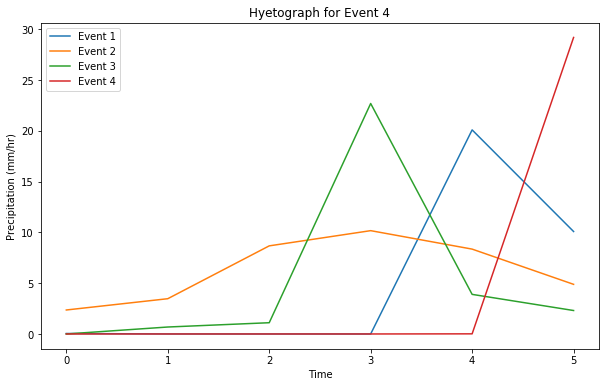

In [82]:
# Assuming each event's DataFrame is stored in 'dataframe' key of dictionaries in the list
# Example event data retrieval
events_dataframes = [event['Event'] for event in events_v1_ls if event['Duration'] ==2]

# Plotting hyetographs
plt.figure(figsize=(10, 6))
for i, event_df in enumerate(events_dataframes):
    event_df.reset_index(inplace=True, drop=True)
    plt.plot(event_df.index, event_df['precipitation (mm/hr)'], label=f'Event {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Precipitation (mm/hr)')
    plt.title(f'Hyetograph for Event {i+1}')
    plt.legend()
plt.show()

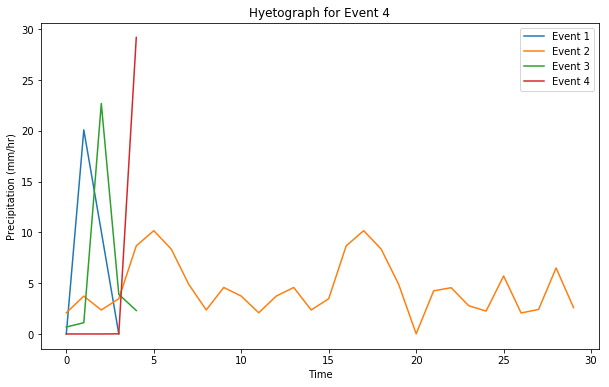

In [85]:
# Assuming each event's DataFrame is stored in 'dataframe' key of dictionaries in the list
# Example event data retrieval
events_dataframes = [event['Event'] for event in events_v2_ls if event['Duration'] ==2]

# Plotting hyetographs
plt.figure(figsize=(10, 6))
for i, event_df in enumerate(events_dataframes):
    event_df.reset_index(inplace=True, drop=True)
    plt.plot(event_df.index, event_df['precipitation (mm/hr)'], label=f'Event {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Precipitation (mm/hr)')
    plt.title(f'Hyetograph for Event {i+1}')
    plt.legend()
plt.show()

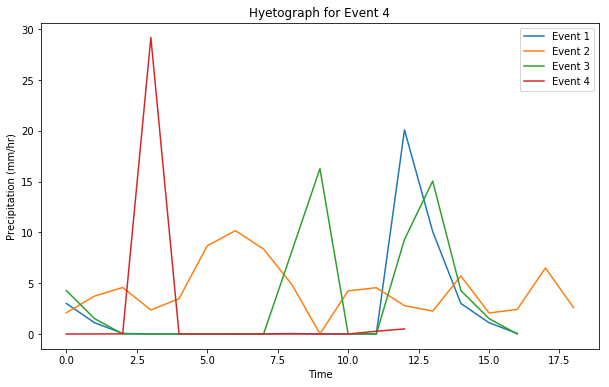

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming each event's DataFrame is stored in 'dataframe' key of dictionaries in the list
# Example event data retrieval
events_dataframes = [event['Event'] for event in events_v2_ls if event['Duration'] ==6]

# Plotting hyetographs
plt.figure(figsize=(10, 6))
for i, event_df in enumerate(events_dataframes):
    event_df.reset_index(inplace=True, drop=True)
    plt.plot(event_df.index, event_df['precipitation (mm/hr)'], label=f'Event {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Precipitation (mm/hr)')
    plt.title(f'Hyetograph for Event {i+1}')
    plt.legend()
plt.show()


### Trying to work out why results for year 2002 and duration 2hr and em BC005 are so different

In [113]:
df =read_model_data(em, yr, idx_2d)

In [ ]:
# SO in the set of independent events algorithm identifies there is an event from 1578-1627
# The event identified by algorithm v1 was 1594-1599
# The event identified by algorithm v1 was 1591-1609

# WHy does V1 trim it like it does?

In [ ]:
duration = 2
# to account for each being 30mins
window_length = duration *2

# to store the outcomes
max_val = 0
max_idx = 'PlaceHolder'
max_df = pd.DataFrame({})

# Search each of the independent rainfall events for a maximum value at this duration
for idx in range(1,len(rainfall_events)):

    # Get this independent event
    one_independent_event_df = rainfall_events[idx]['event_data']

    # Filter out events shorter than this duration
    if len(one_independent_event_df)>window_length:

        # Calculate the rolling sum of precipitation for each 2-hour window
        one_independent_event_df['Rolling_Sum'] = one_independent_event_df['precipitation (mm)'].rolling(window=window_length).sum()

        # Find the index of the maximum total rainfall within a 2-hour window
        max_rainfall_end_index = one_independent_event_df['Rolling_Sum'].idxmax()

        # Find the position of max_rainfall_end_index in the DataFrame's index
        max_rainfall_end_pos = one_independent_event_df.index.get_loc(max_rainfall_end_index)

        # Calculate the start position of the 2-hour window with the most rainfall
        # This accounts for 3 periods before the max index, as the max index is inclusive
        max_rainfall_start_pos = max(0, max_rainfall_end_pos - window_length-1)  # Ensure it doesn't go below the DataFrame's range

        # Extract the 2-hour window using iloc
        max_rainfall_window = one_independent_event_df.iloc[max_rainfall_start_pos:max_rainfall_end_pos + 1]

        # Display the results
        # print(f"The 2-hour window with the most rainfall ends at {max_rainfall_end_index} and includes:")

        # If the maximum value for this duration in this independent event, is bigger than the biggest one that came before
        # then save these results
        if one_independent_event_df['Rolling_Sum'].max() > max_val:
            max_val = one_independent_event_df['Rolling_Sum'].max()
            max_df = max_rainfall_window
            max_idx = idx
        else:
            pass